# Projektni zadatak: Segmentacija fotografije
Segmentacija fotografije je proces podele digitalne fotografije na više segmenata (skupova piksela) odnosno različitih regiona ili kategorija, pri čemu svaka regija sadrži piksele sa sličnim atributima, a svaki piksel na fotografiji dodeljuje se jednoj od ovih kategorija. Segmentacija fotografije je zapravo postupak dodeljivanja oznake svakom pikselu na fotografiji tako da pikseli sa istom oznakom dele određene karakteristike.

Cilj segmentacije je pojednostavljivanje i/ili promena prikaza fotografije u nešto što je značajnije i lakše za analizu. Segmentacija se obično koristi za lociranje objekata i granica (linija, ivica, itd.) na fotografijama.

Podela fotografije na ispravne segmente je često vrlo izazovan problem i jako je važno da ona bude dobro odrađena, jer kvalitet i pouzdanost segmentacije diktiraju da li će analiza fotografije biti uspešna, pa će tako i sve druge faze u analizi fotografije biti pojednostavljene.

Zadatak koji je potrebno uraditi u okviru ovog projekta podrazumeva izgradnju modela koji bi prihvatao ulazne seizmičke fotografije (satelitske snimke Zemlje) i predvidjao na nivou svakog piksela da li je na njemu prikazana so ispod površine Zemlje ili ne, odnosno vršio segmentaciju fotografije na deo koji predsatvlja so i deo koji predstavlja površinu u čijem sastavu nije prisutna so.

Dataset koji je korišćen za potrebe izrade ovog projekta nalazi  se na Google Drive-u i možete mu pristupiti putem sledećeg linka https://drive.google.com/file/d/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu/view?usp=sharing.
On obuhvata train.zip fajl, koji je nakon importovanja potrebno unzipovati, u okviru kog se nalaze dva foldera: images (sadrži skup seizmičkih slika za trening) i masks (svaka slika ima svoju masku u training setu koja određuje regione u kojima je prisutna so). Kako test skup sadrži samo fotografije bez njihovih maski, iako je moguće vršiti predikciju na takvom skupu i izdvojiti regione u kojima se verovatno nalazi so, ja sam za potrebe ovog projekta koristio samo training set (koji sam podelio na deo za treniranje i deo za validaciju) kako bih mogao da uporedim dobijene rezultate (predikcije) nakon treniranja modela sa maskama koje su date.

**Metode segmentacije**

U literaturi se mogu naći različite podele kada su u pitanju tehnike koje se primjenjuju pri segmentaciji slika. Međutim, kada se govori o osnovnoj podeli, izdvajaju se dve najčešće korišćene tehnike: 

1.   Pronalaženje ivica – izdvajanje samo onih piksela koji pripadaju rubovima objekata i 
2.   Izdvajanje regiona – izdvajanje celog objekta od pozadine pridružujući piksele čija je svetlost ispod nekog praga pozadini, a ostale objektu i obrnuto


**Algoritmi i tehnike za segmentaciju**

Postoje različite podele algoritama i tehnika za segmentaciju u zavisnosti od autora ali najveći broj njih vidi sledeće četiri tehnike koje se koriste:


1.   Segmentacija pragom (Thresholding) 
2.   Segmentacija klasterizacijom (Clustering) 
3.   Segmentacija regionom (Region) 
4.   Segmentacija granicom regiona (Edge) 

**Segmentacija pragom** predstavlja grupu metoda zasnovanih na poređenju osvetljenosti piksela sa jednim ili više pragova, pa tako imamo segmentaciju sa jednim i segmentaciju sa više pragova. Ukoliko imamo slike u boji tada se vrši poređenje boje između piksela. Segmentacija sa jednim pragom predstavlja najjednostavniji vid segmentacije i njegova osnovna primena je za odvajanje objekta od pozadine, ukoliko pozadina ima uniformnu osvjetljenost (boju) koja se razlikuje od objekta. Ovakav način segmentacije se može primjeniti, npr., kod izdvajanja pisanog ili štampanog teksta, analize nekih biomedicinskih slika, prepoznavanja tipa aviona koji leti, itd. Segmentacija sa više pragova je metoda koju je pogodno koristiti u slučaju kada imamo scene sa više različitih objekata.

**Segmentacija klasterizacijom** je jedna od najstarijih tehnika segmentacije, s obzirom da se može koristiti za segmentaciju sivih i slika u boji. Za vektor x=[x1, x2,…,xN] koji predstavlja merenja karakteristika jednog piksela slike, merene veličine mogu biti tri komponente boje piksela, ili neka druga obeležja izračunata u malom prozoru oko posmatranog piksela. Postupak segmentacije se u tom slučaju sastoji od podele N–dimenzionalnog prostora u uzajamno isključive oblasti, pri čemu svaka ta oblast obuhvata grupu podataka koja se odnosi na jedan region slike. Takav proces podele prema sličnosti vektora podataka se naziva klasterizacija. U prvoj fazi segmentacije vrši se izračunavanje i izdvajanje nekih obeležja slike. Sledeća faza podrazumijeva određivanje optimalnog broja regiona (klastera), kao i određivanje skupa vektora koji predstavljaju centre svakog klastera. Nakon toga se vrši pridruživanje svakog piksela jednom od klastera. Pridruživanje se vrši na osnovu sličnosti vektora koji opisuje piksel i vektora koji opisuje centar klastera. Ova metoda je sa dosta uspeha primenjivana u segmentaciji multispektralnih satelitskih ili avionskih snimaka, gdje je osnovni cilj bio izdvajanje regiona na površini zemlje koji imaju iste karakteristike, kao što su npr., isti tip poljoprivrednih kultura, isti sastav zemljišta, ista nadmorska visina, itd. Nedostatak ove metode je što ima veliku računsku složenost. 

**Segmentacija regionom** predstavlja skup metoda koje pokušavaju da izdvoje područja slike koja su homogena sa gledišta određenih karakteristika. U ovu grupu spadaju:  

*   Segmentacija pomoću rasta regiona
*   Segmentacija pomoću razdvajanja i spajanja regiona

Osnovna ideja **segmentacije pomoću rasta** regiona je da se izvrši grupisanje susednih piksela sličnih osvetljenosti (boja), na osnovu čega se formiraju regioni. Postupak grupisanja počinje spajanjem po dva piksela istih karakteristika, pri čemu nastaje atomski region. Nakon toga se posmatraju dva susedna regiona R1 i R2, čiji su obimi (broj ivičnih piksela) označeni sa P1 i P2. Neka C predstavlja dužinu zajedničke granice regiona, a D dužinu zajedničke granice gde je razlika između karakteristika piksela sa obe strane granice manja od unapred definisane vrednosti. Kažemo da će se regioni R1 i R2 spojiti ukoliko važi: 𝐷 𝑚𝑖𝑛(𝑃1,𝑃2,) > ε2 gde je ε2 konstanta čija je vrednost najčešće jednaka 0.5. Zatim se vrši ispitivanje ostalih atomskih regiona, nakon čega se prelazi na ispitivanje regiona većih dimenzija sve dok je spajanje moguće. Metoda rasta regiona je naročito pogodna kod segmentacije prostih scena sa malim brojem objekata i slabom teksturom. 

Kod **segmentacije pomoću razdvajanja i spajanja regiona**, slika se deli na četiri kvadranta, nakon čega se ispituje da li su dobijeni podsegmenti uniformni po obeležju na osnovu kojeg se vrši segmentacija. Uniformnost se može definisati kao razlika između najmanje i najveće osvetljenosti piksela u regionu, preko varijanse osvetljenosti ili preko neke druge statističke mere. Svaki podsegment, za koji nije zadovoljen uslov uniformnosti, se dalje deli na četiri nova podsegmenta. Nakon što se izvrši razdvajanje, prelazi se na obrnuti postupak – spajanje regiona. Regioni koji imaju isto uniformno obeležje spajaju se u veći region. Nedostatak ove metode je u tome što se javlja vidljiva blokovska struktura regiona.

U procesu **segmentacije koji koristi ivice (granice regiona)** mora se primeniti i neki postupak za spajanje ivica, kako bi se formirale neprekidne granice regiona iz razloga što metode koje vrše izdvajanje ivica generišu isprekidane granice objekata a ne zatvorene krive. U tu svrhu se mogu koristiti: metoda spajanja ivica fitovanjem krive, spajanje ivica heurističkim metodama i spajanje ivica Hafovom transformacijom. Metodom fitovanja krivih se mogu rekonstruisati nedostajući segmenti ukoliko mapa ivica sadrži prekinute ivice. Fitovanje krivih je najjednostavnije kada nam je poznat oblik krive, pa se nedostajući segment dobija fitovanjem npr. pravih ili kružnih oblika. Kada su granice regiona složenije, vrši se razlaganje granice na jednostavnije delove. Glavna prednost ovog metoda je njena izuzetna jednostavnost i ona daje dobre rezultate u slučaju segmentacije jednostavnih scena. Međutim, kada imamo slike na kojima postoji veći broj objekata koji se preklapaju, mapa ivica sadrži tačke grananja, pa u tom slučaju ova metoda ne daje dobre rezultate. Kod heurističkih metoda za spajanje ivica se prvo formira gradijentna slika primenom odgovarajućih maski.

U okviru projekta korišćena je **U-Net** kovoluciona neuronska mreža koja obezbeđuje brzu i preciznu semantičku segmentaciju slika.
Njena arhitektura može se posmatrati kao mreža enkodera koju prati mreža dekodera. Za razliku od klasifikacije gde je krajnji rezultat mreže jedina važna stvar, semantička segmentacija ne zahteva samo diskriminaciju na nivou piksela već i mehanizam za projektovanje diskriminativnih karakteristika naučenih u različitim fazama enkodera na prostor piksela.

Učitavanje dataseta potrebnog za izvršavanje projektnog zadatka.

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu" -O images.zip && rm -rf /tmp/cookies.txt

--2021-09-24 20:34:19--  https://docs.google.com/uc?export=download&confirm=owrV&id=1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu
Resolving docs.google.com (docs.google.com)... 173.194.216.139, 173.194.216.101, 173.194.216.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.216.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-90-docs.googleusercontent.com/docs/securesc/dpc6k0q2j8l06hg1oc8pu85heaoo84ma/uqeipnnb8l7rn2bq2nplqma924enfkfq/1632515625000/02667485512418348371/12394915128738093590Z/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu?e=download [following]
--2021-09-24 20:34:19--  https://doc-0k-90-docs.googleusercontent.com/docs/securesc/dpc6k0q2j8l06hg1oc8pu85heaoo84ma/uqeipnnb8l7rn2bq2nplqma924enfkfq/1632515625000/02667485512418348371/12394915128738093590Z/1uXedNmn-zjJGL4jW2ooP0N2hv83bUcSu?e=download
Resolving doc-0k-90-docs.googleusercontent.com (doc-0k-90-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connect

Unzip dataseta

In [2]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/d80ead8703.png   
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   

Importovanje biblioteka potrebnih za rad

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import *
import os
from tensorflow.keras import Model, Input
from tensorflow.keras.models import load_model, save_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Conv2DTranspose
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, Activation, Add
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf

Definisanje putanja ka folderima u kojima se nalaze podaci

In [4]:
TRAIN_IMAGE_DIR = '/content/images'
TRAIN_MASK_DIR = '/content/masks'

#listdir metoda (iz os modula koji obezbeđuje funkcije za intereakciju sa operativnim sistemom) vraca nazive fotografija 
#koje se nalaze u okviru direktorijuma koji je prosleđen kao parametar metode
train_d = os.listdir(TRAIN_IMAGE_DIR)

Prolazak kroz sve fotografije i formiranje nizova sa slikama i maskama pri čemu se vrši normalizovanje piksela da bi bili u vrednosti od 0 do 1, radi lakseg procesiranja.

In [5]:
x = [np.array(cv2.imread(TRAIN_IMAGE_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
x = np.array(x)/255

y = [np.array(cv2.imread(TRAIN_MASK_DIR + "/{}".format(p), cv2.IMREAD_GRAYSCALE)) for p in train_d]
y = np.array(y)/255

print(x.shape, y.shape)

(4000, 101, 101) (4000, 101, 101)


Definisanje funkcije za prikaz nasumično odabranih fotografija korisćenjem funkcije randint zajedno sa maskama koje su predsatvljene crvenom bojom.

In [6]:
def plotImages(file1, file2, k, alpha = 0.4):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  return(fig)

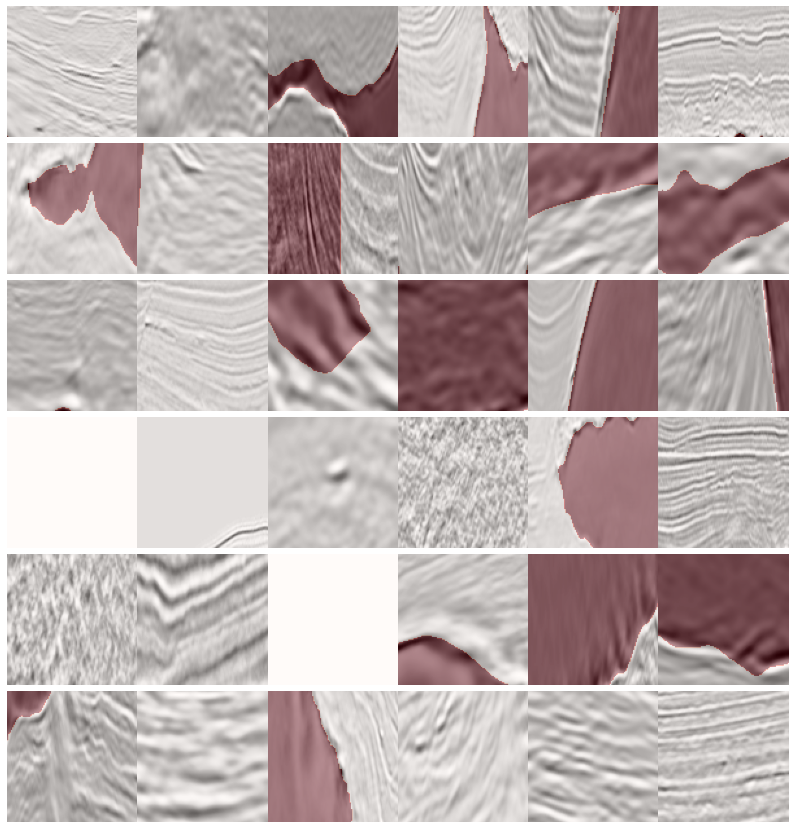

In [7]:
fig = plotImages(x,y,k=6)

Podela podataka: 80% za treniranje i 20% za testiranje

In [8]:
x_train,x_validation,y_train,y_validation = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=50)

In [9]:
print("x_train shape:",x_train.shape)
print("x_validation shape:",x_validation.shape)
print("y_train shape:",y_train.shape)
print("y_validation shape:",y_validation.shape)

x_train shape: (3200, 101, 101)
x_validation shape: (800, 101, 101)
y_train shape: (3200, 101, 101)
y_validation shape: (800, 101, 101)


# Kreiranje CNN modela
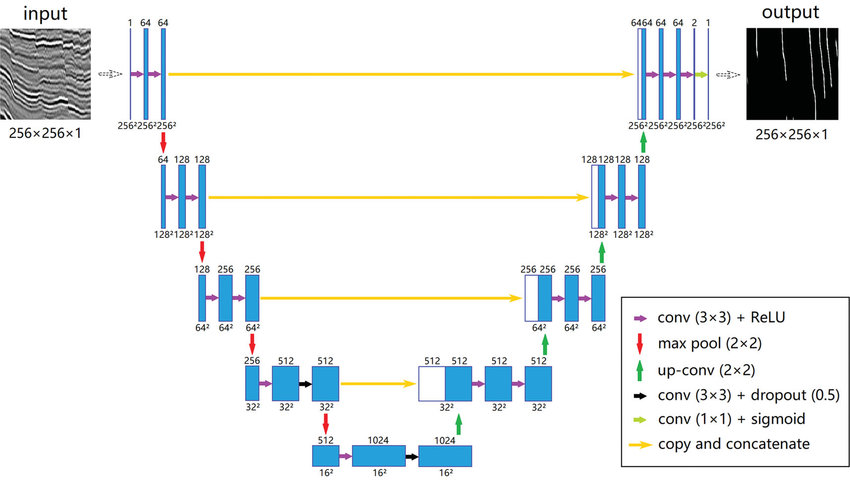

**U-Net** mreza se sastoji se od contracting putanje (leva strana) i expansive putanje (desna strana). Contracting putanju prati tipična arhitektura konvolucione mreže. Ona podrazumeva ponovljenu primenu dve konvolucije 3x3, nakon čega sledi Rectified Linear Unit (ReLU) i operacija MaxPolling 2x2 sa korakom 2 za downsampling (smanjenje slike). U svakom koraku smanjenja slike udvostručuje se broj kanala. 

Svaki korak u expansive putanji sastoji se od upsampling-a mape obeležja praćenih 2x2 konvolucijom („up-convolution“) koja prepolovljava broj kanala, spajanja sa odgovarajućom isečenom mapom obeležja sa contracting putanje i dve 3x3 konvolucije, nakon kojih sledi ReLU. Uzimanje uzoraka može se izvršiti korišćenjem Transpose Convolution Operation. Cropping je neophodan zbog gubitka graničnih piksela u svakoj konvoluciji. Na završnom sloju 1x1 konvolucija se koristi za mapiranje svakog od 64 vektora komponente u željeni broj klasa.

In [10]:
def BatchActivate(x):
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

#definisanje konvolucionog bloka
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    if activation==True: x = BatchActivate(x)
    return x

#definisanje residual (identity) bloka
def residual_block(blockInput, num_filters=16, batch_activate=False):
    x = BatchActivate(blockInput)
    x = convolution_block(x, num_filters, (3,3))
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    if batch_activate: x = BatchActivate(x)
    return x

Prilikom definisanja modela kombinuju se konvolucioni i residual blokovi kako bi se izgradila ResNet mrež

In [ ]:

def build_model(input_layer, start_neurons, DropoutRatio=0.5):
    # 101 -> 50
    conv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(input_layer)
    conv1 = residual_block(conv1, start_neurons*1)
    conv1 = residual_block(conv1, start_neurons*1, True)
    pool1 = MaxPooling2D((2,2))(conv1)
    pool1 = Dropout(DropoutRatio/2)(pool1)
    print("conv1", conv1)
    # 50 -> 25
    conv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(pool1)
    conv2 = residual_block(conv2, start_neurons*2)
    conv2 = residual_block(conv2, start_neurons*2, True)
    pool2 = MaxPooling2D((2,2))(conv2)
    pool2 = Dropout(DropoutRatio)(pool2)
    print("conv2", conv2)
    # 25 -> 12
    conv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(pool2)
    conv3 = residual_block(conv3, start_neurons*4)
    conv3 = residual_block(conv3, start_neurons*4, True)
    pool3 = MaxPooling2D((2,2))(conv3)
    pool3 = Dropout(DropoutRatio)(pool3)
    print("conv3", conv3)
    # 12 -> 6
    conv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(pool3)
    conv4 = residual_block(conv4, start_neurons*8)
    conv4 = residual_block(conv4, start_neurons*8, True)
    pool4 = MaxPooling2D((2,2))(conv4)
    pool4 = Dropout(DropoutRatio)(pool4)
    print("conv4", conv4)
    # Middle
    convm = Conv2D(start_neurons*16, (3,3), activation=None, padding='same')(pool4)
    convm = residual_block(convm, start_neurons*16)
    convm = residual_block(convm, start_neurons*16, True)
    print("convm", convm)
    # 6 -> 12
    deconv4 = Conv2DTranspose(start_neurons*8, (3,3), strides=(2,2), padding='same')(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(DropoutRatio)(uconv4)
    
    uconv4 = Conv2D(start_neurons*8, (3,3), activation=None, padding='same')(uconv4)
    uconv4 = residual_block(uconv4, start_neurons*8)
    uconv4 = residual_block(uconv4, start_neurons*8, True)
    print("conv4", uconv4)
    # 12 -> 25
    deconv3 = Conv2DTranspose(start_neurons*4, (3,3), strides=(2,2), padding='valid')(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(DropoutRatio)(uconv3)
    
    uconv3 = Conv2D(start_neurons*4, (3,3), activation=None, padding='same')(uconv3)
    uconv3 = residual_block(uconv3, start_neurons*4)
    uconv3 = residual_block(uconv3, start_neurons*4, True)
    print("conv3", uconv3)
    # 25 -> 50
    deconv2 = Conv2DTranspose(start_neurons*2, (3,3), strides=(2,2), padding='same')(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(DropoutRatio)(uconv2)
    
    uconv2 = Conv2D(start_neurons*2, (3,3), activation=None, padding='same')(uconv2)
    uconv2 = residual_block(uconv2, start_neurons*2)
    uconv2 = residual_block(uconv2, start_neurons*2, True)
    print("conv2", uconv2)
    # 50 -> 101
    deconv1 = Conv2DTranspose(start_neurons*1, (3,3), strides=(2,2), padding='valid')(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(DropoutRatio)(uconv1)
    
    uconv1 = Conv2D(start_neurons*1, (3,3), activation=None, padding='same')(uconv1)
    uconv1 = residual_block(uconv1, start_neurons*1)
    uconv1 = residual_block(uconv1, start_neurons*1, True)
    
    output_layer_noActi = Conv2D(1, (1,1), padding='same', activation=None)(uconv1)
    output_layer = Activation('sigmoid')(output_layer_noActi)
    
    return output_layer

Detaljan prikaz svakog sloja mreže

In [ ]:
input_layer = Input((101, 101, 1))
output_layer = build_model(input_layer, 32,0.5)

model = Model(input_layer, output_layer)
model.summary()

conv1 KerasTensor(type_spec=TensorSpec(shape=(None, 101, 101, 32), dtype=tf.float32, name=None), name='activation_4/Relu:0', description="created by layer 'activation_4'")
conv2 KerasTensor(type_spec=TensorSpec(shape=(None, 50, 50, 64), dtype=tf.float32, name=None), name='activation_9/Relu:0', description="created by layer 'activation_9'")
conv3 KerasTensor(type_spec=TensorSpec(shape=(None, 25, 25, 128), dtype=tf.float32, name=None), name='activation_14/Relu:0', description="created by layer 'activation_14'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_19/Relu:0', description="created by layer 'activation_19'")
convm KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 512), dtype=tf.float32, name=None), name='activation_24/Relu:0', description="created by layer 'activation_24'")
conv4 KerasTensor(type_spec=TensorSpec(shape=(None, 12, 12, 256), dtype=tf.float32, name=None), name='activation_29/Relu:0', description="cre

Kompajliranje modela s obzirom da to zahteva Keras

In [ ]:
# binary cross entropy izračunava loss između stvarnih i predviđenih vrednosti
# Adam je optimizator koji koristi Adam optimizacioni algoritam koji se može koristiti 
# umesto klasične stohastičke gradiant descent procedure za prilagođavanje stope ućenja (ažuriranje težina veza i minimizaciju greške)  
model.compile(loss = "binary_crossentropy", optimizer= "adam", metrics= ["accuracy"])

Kako biste uštedeli 11h čekanja na treniranje modela, možete preskočiti sledeću ćeliju sa kodom i učitati model koji sam ja već prethodno istrenirao

In [ ]:
# Early stopping je tehnika koja se koristi da prekine obuku modela u slučaju da željeni (prosleđeni) parametri prestanu da se poboljšavaju
# Na kraju svake epohe se proverava da li prosleđena metrika (u ovom slucaju tacnost na validacionom skupu - val_accuracy) raste za minimalnu vrednost od 0.001
# i ukoliko to nije slučaj ni nakon 10 epoha (patience = 10) prekinuće se treniranje modela, a sve u cilju kako bi se smanjio overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=10, verbose=1)
model_checkpoint = ModelCheckpoint("./keras.model", monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_LR = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr=0.00000005, verbose=1)

history = model.fit(x_train, y_train, validation_data=(x_validation,y_validation), epochs = 15, batch_size = 128, callbacks = [early_stopping, model_checkpoint, reduce_LR])

Epoch 1/15
25/25 [==============================] - 2639s 105s/step - loss: 0.5123 - accuracy: 0.7585 - val_loss: 11.3688 - val_accuracy: 0.2544

Epoch 00001: val_accuracy improved from -inf to 0.25438, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 2/15
25/25 [==============================] - 2618s 105s/step - loss: 0.3492 - accuracy: 0.8769 - val_loss: 9.4210 - val_accuracy: 0.3818

Epoch 00002: val_accuracy improved from 0.25438 to 0.38178, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 3/15
25/25 [==============================] - 2627s 105s/step - loss: 0.2987 - accuracy: 0.8949 - val_loss: 3.6166 - val_accuracy: 0.5971

Epoch 00003: val_accuracy improved from 0.38178 to 0.59713, saving model to ./keras.model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ./keras.model/assets
Epoch 4/15
25/25 [==============================] - 2608s 104s/step - loss: 0.2792 - accuracy: 0.8978 - val_loss: 6.7606 - val_accuracy: 0.2948

Epoch 00004: val_accuracy did not improve from 0.59713
Epoch 5/15
25/25 [==============================] - 2608s 104s/step - loss: 0.2667 - accuracy: 0.8987 - val_loss: 4.5742 - val_accuracy: 0.4942

Epoch 00005: val_accuracy did not improve from 0.59713
Epoch 6/15
25/25 [==============================] - 2597s 104s/step - loss: 0.2551 - accuracy: 0.9023 - val_loss: 8.5282 - val_accuracy: 0.2546

Epoch 00006: val_accuracy did not improve from 0.59713
Epoch 7/15
25/25 [==============================] - 2575s 103s/step - loss: 0.2319 - accuracy: 0.9140 - val_loss: 9.8596 - val_accuracy: 0.2546

Epoch 00007: val_accuracy did not improve from 0.59713
Epoch 8/15
25/25 [==============================] - 2579s 103s/step - loss: 0.2210 - accuracy: 0.9174 - val_loss: 4.7175 - val_accuracy: 0.2720


Pokrenite ćeliju ispod kako biste učitali prethodno istrenirani model ukoliko ste preskočili prethonu ćeliju, u suprotnom preskočite ovu

In [ ]:
model = load_model('/content/keras.model')

In [ ]:
model.summary()

Prikaz histograma sa porđenjem vrednosti za tačnost (accuracy) i gubitak (loss) na skupu podataka za trening i test tokom različitih epoha treniranja modela

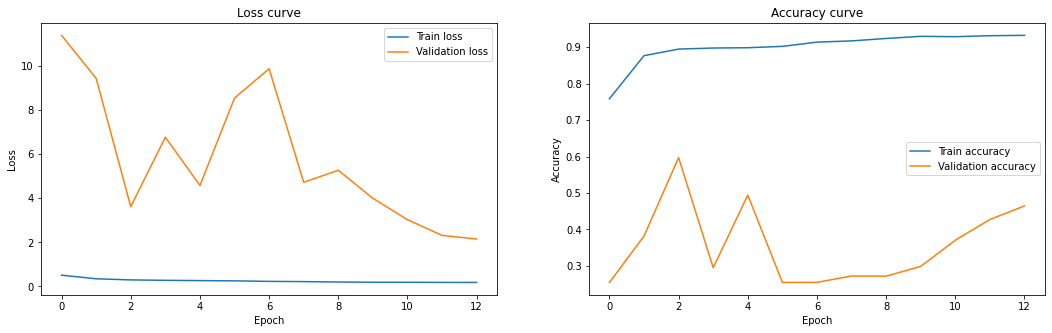

In [ ]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(18, 5))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_xlabel("Epoch")
ax_loss.set_ylabel("Loss")
ax_loss.set_title("Loss curve")
ax_loss.legend()
ax_acc.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax_acc.set_xlabel("Epoch")
ax_acc.set_ylabel("Accuracy")
ax_acc.set_title("Accuracy curve")
ax_acc.legend()


In [ ]:
result = model.evaluate(x_validation, y_validation)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

25/25 [==============================] - 143s 6s/step - loss: 2.1492 - accuracy: 0.4645
[+] Accuracy: 46.45%


Kao što se može videti tačnost i nije mnogo velika i iznosi 46.45%

# Predikcija na validacionom setu

Nakon što je model istreniran vrši se predikcija na validacionom setu.

U nastavku su predstavljene nasumično odabrane slike na kojima je crvenom bojom označena maska koja ozačava stvarne vrednosti koje predstavljaju so (vrednost piksela maske je 1) dok su zelenom bojom obojene predikcije dobijene na osnovu prethodno istreniranog modela. 

In [ ]:
pred_validation = model.predict(x_validation)
pred_validation = pred_validation[:,:,:,0]
print(x_validation.shape, y_validation.shape)

(800, 101, 101) (800, 101, 101)


In [ ]:
def plotValidationImages(file1, file2, file3, k, alpha1, alpha2):
  fig, ax = plt.subplots(nrows=k, ncols=k, figsize=(15,15))
  for i in range(k):
    for j in range(k):
      ind = randint(0, file1.shape[0]-1)
      ax[i,j].imshow(file1[ind], cmap='Greys')
      ax[i,j].imshow(file2[ind], cmap='Reds', alpha = alpha1)
      ax[i,j].imshow(file3[ind], cmap='Greens', alpha = alpha2)
      ax[i,j].set_axis_off()
  fig.subplots_adjust(wspace = -0.30, hspace= 0.05)
  plt.suptitle("Crvena: so    Zelena: predikcija")
  return(fig)

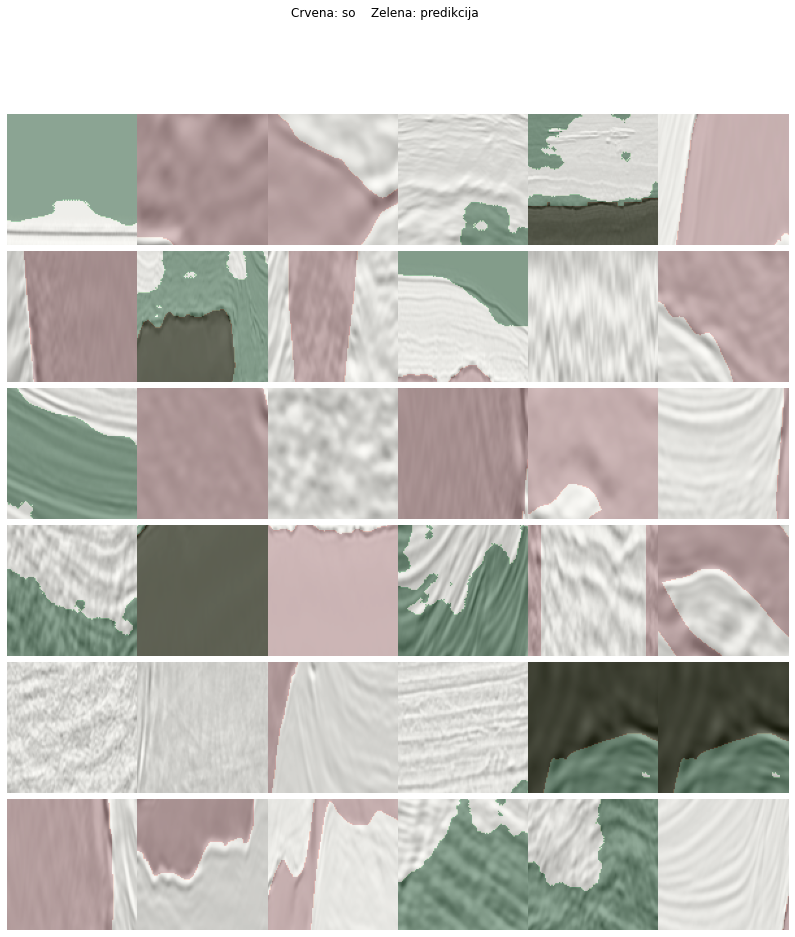

In [ ]:
fig = plotValidationImages(x_validation, y_validation, np.round(pred_validation), k = 6, alpha1=0.4, alpha2=0.4)

# **IOU** (Intersection over Union) metrika

IOU je evaluaciona metrika koja se najčešće koristi u oblasti detekcije objekata da označi tačnost detekcije, dok se u mom primeru koristi da označi sličnost između regiona koji stvarno predstavljaju so i onih koji su dobije predikcijom.

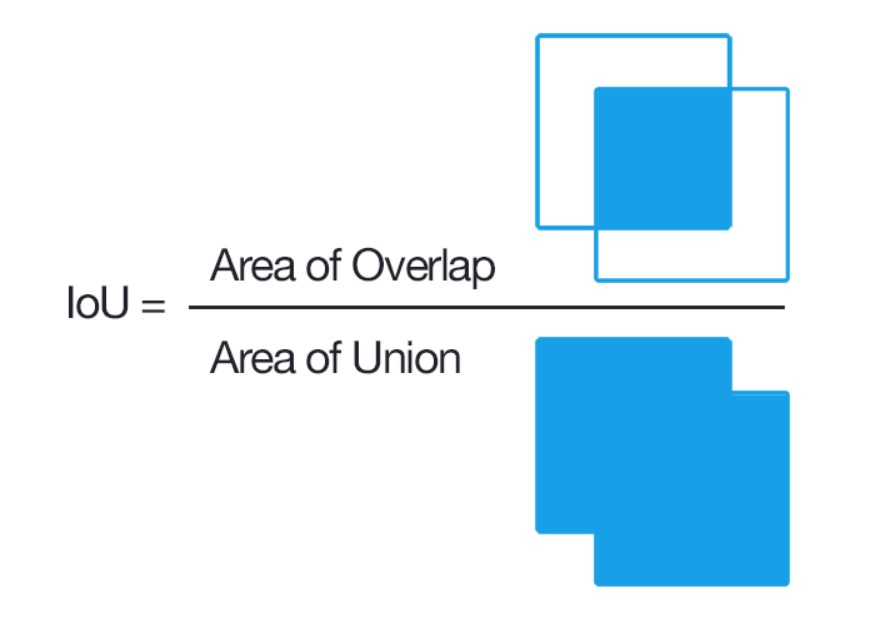

Kako ova metrika predstavlja odnos izmedju zajedničkih delova dva regiona (maske i predikcije), odnosno njihovog preseka i unije ta dva regiona, jasno je da što je vrednost ove metrike bliža 1 to je predikcija tačnija i model bolji.

In [ ]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in

    true_objects = 2
    pred_objects = 2

    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))

    intersection = temp1[0]

    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Izračunava se unija
    union = area_true + area_pred - intersection
      
    # Isključuejmo pozadinu iz analize
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Izračunava se vrednost IOU metrike
    iou = intersection / union

    # Pomoćna funkcija preciznosti
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # tačno pogodjeni objekti
        false_positives = np.sum(matches, axis=0) == 0  # pogrešno klasifikovani objekti
        false_negatives = np.sum(matches, axis=1) == 0  # objekti koji su pogrešno prepoznati kao negativni
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Prolazak kroz threshold iou vrednosti
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    # np.arrange vraca ravnomerno raspoređene vrednosti unutar intervala 0.5 i 1.0 sa korakom od 0.05
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    return np.mean(metric)

In [ ]:
thresholds = np.linspace(0.3, 0.7, 31)
ious = np.array([iou_metric_batch(y_validation, np.int8(pred_validation > threshold)) for threshold in thresholds])
print(ious)

[0.191125 0.191625 0.194375 0.19625  0.197125 0.197625 0.198375 0.19875
 0.20025  0.200375 0.204375 0.20475  0.206375 0.20675  0.20725  0.209125
 0.209625 0.21125  0.21175  0.21375  0.215625 0.2165   0.21675  0.21875
 0.219875 0.2205   0.22125  0.224125 0.2315   0.233375 0.2365  ]


In [ ]:
threshold_best_index = np.argmax(ious) 
iou_best = ious[threshold_best_index]
threshold_best = thresholds[threshold_best_index]
print("threshold best",threshold_best)
print("iou best",iou_best)

threshold best 0.7
iou best 0.2365


Može se videti da je dobijena vrednost IOU metrike prilično mala, te da bi bilo potrebno prilagoditi model kako bi kasnije predikcije bile bolje.

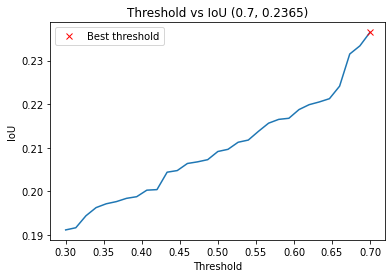

In [ ]:
plt.plot(thresholds, ious)
plt.plot(threshold_best, iou_best, "xr", label="Best threshold")
plt.xlabel("Threshold")
plt.ylabel("IoU")
plt.title("Threshold vs IoU ({}, {})".format(threshold_best, iou_best))
plt.legend()

Prikaz nasumično odabranih forografija nakon što je odrađena IOU metrika

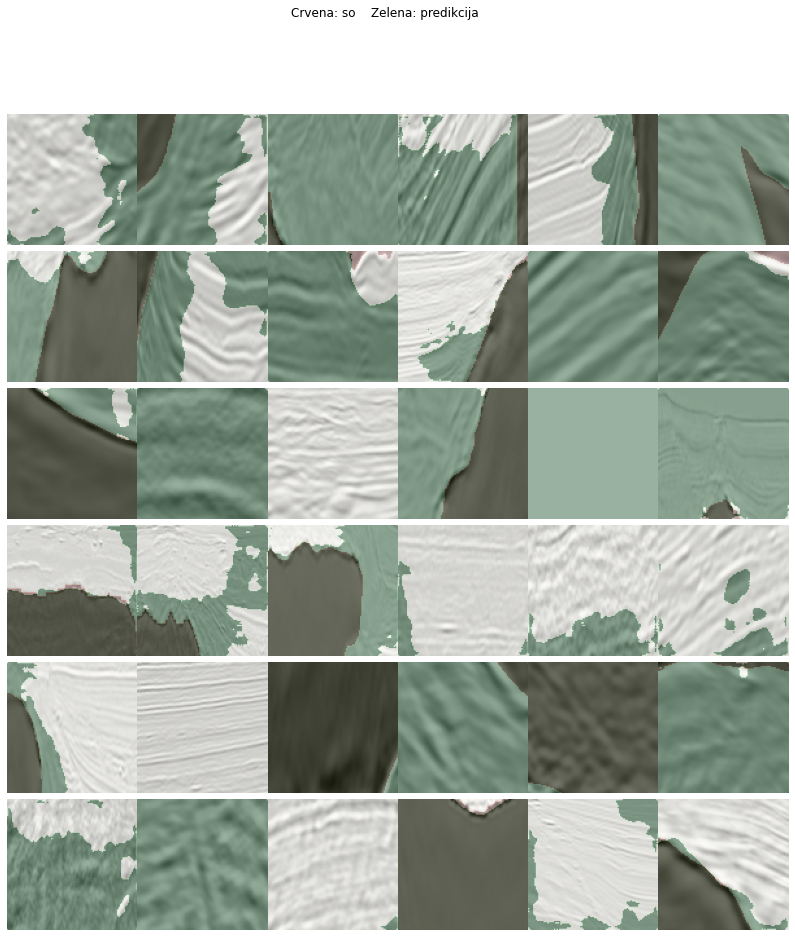

In [ ]:
fig = plotValidationImages(x_validation, y_validation, np.int32(pred_validation > threshold_best), k = 6, alpha1=0.4, alpha2=0.4)